In [56]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv("archive/data.csv")
dat_artist = pd.read_csv("archive/data_by_artist.csv")
dat_genres = pd.read_csv("archive/data_by_genres.csv")
dat_year = pd.read_csv("archive/data_by_year.csv")
dat_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [43]:
def query_artist(artist):
    return [True if dat["artists"][i] == [artist] else False for i in range(len(dat["artists"]))]

dat["artists"] = dat["artists"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [44]:
classical_artists = dat_w_genres[[True if "classical" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]

pop_artists = dat_w_genres[[True if "pop" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
pop_artists

9                "Weird Al" Yankovic
19                      'Til Tuesday
20                         ((( O )))
23                          (G)I-DLE
25                            *NSYNC
27                                 -
34                    10,000 Maniacs
35                          100 gecs
38                              10cc
40                               112
41                             11:11
49             1910 Fruitgum Company
50                  1986 Omega Tribe
52       2 Brothers On The 4th Floor
53                          2 Chainz
59                         2 Pistols
60                       2 Unlimited
72                          24kGoldn
74                             2Baba
75                           2CELLOS
77                              2NE1
85                      3 Doors Down
90                               311
95                              3LAU
96                               3LW
97                             3OH!3
103                    4 Non Blondes
1

In [45]:
classical_artists = classical_artists["artists"]
classical_artists

179          A Winged Victory for the Sullen
202                            A. R. Qureshi
261                            Aaron Copland
318                 Academy of Ancient Music
319      Academy of St. Martin in the Fields
407                       Adrianne Pieczonka
411                          Adrienne Albert
412                            Adrián Patiño
453                             Agnes Baltsa
454                             Agnes Giebel
466                  Agustín Barrios Mangoré
500           Akademie für Alte Musik Berlin
551                             Alain Planes
562                             Alan Gilbert
594                               Alban Berg
595                      Alban Berg Quartett
606                          Albert Lortzing
629                                Alcatrazz
635                                Alda Noni
641                           Aldo Ciccolini
646                              Aldo Protti
670                      Alessandro Corbelli
673       

In [66]:
country_artists = dat_w_genres[[True if "country" in dat_w_genres.loc[i,"genres"] else False for i in range(len(dat_w_genres))]]["artists"]
country_artists

84       2nd South Carolina String Band
93                           38 Special
173                   A Thousand Horses
267                         Aaron Lewis
274                        Aaron Tippin
276                        Aaron Watson
287                       Abby Anderson
345                        Adam Calhoun
347                        Adam Carroll
349                         Adam Doleac
354                           Adam Hood
502                                Akin
519            Al Dexter & His Troopers
531                           Al Kooper
534                          Al Stewart
539                             Alabama
566                        Alan Jackson
658                  Alejandro Escovedo
713             Alexander 'Skip' Spence
723                      Alexander King
913                           Alvin Lee
937                       Amanda Shires
943                 Amazing Rhythm Aces
953                            Ambrosia
1035                     Anders Osborne


In [67]:
dat.head()
possible_pop = dat[[pop_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_classical = dat[[classical_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]
possible_country = dat[[country_artists.isin(dat.loc[i, "artists"]).any() for i in range(len(dat))]]

In [68]:
pop = possible_pop[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

classical = possible_classical[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

country = possible_country[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'explicit',
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

X = pd.concat([pop, classical, country])

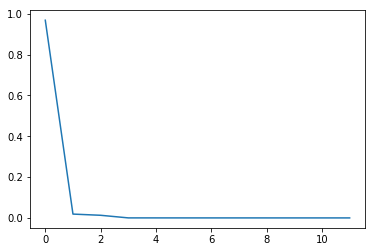

In [71]:
pca = PCA(n_components=12)
pca.fit(country)
pcavar = pca.explained_variance_ratio_
plt.plot(pcavar)

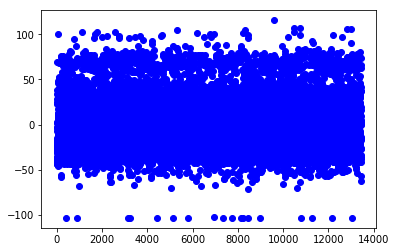

In [81]:
pca_mod = PCA(n_components=1)
pcadat = pca_mod.fit_transform(classical)
d = pd.DataFrame(data=pcadat, columns=["Principal Component 1"])
plt.plot(d["Principal Component 1"], 'bo')